# Handwritten Digit Recognition on MNIST Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('MNIST_train.csv')

In [3]:
train=train.drop(columns=['Unnamed: 0']).dropna()

In [4]:
labels = train['labels'].unique()

In [5]:
# train.describe

In [6]:
train.columns

Index(['index', 'labels', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=786)

In [7]:
X = train.drop(columns = ['labels','index'])
y = train['labels']

In [8]:
groups = train.groupby(['labels'])
data_points = {}
for group_name, group_df in groups:
    data_points[group_name] = group_df.drop(columns=['labels','index']).to_numpy()

In [9]:
reshaped_data_points = {}
for k in data_points:
  reshaped_data_points[k[0]] = np.reshape(data_points[k],(data_points[k].shape[0],28,28))

### Visualization

C:\Users\rawal\AppData\Local\Temp\ipykernel_27636\3432750854.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


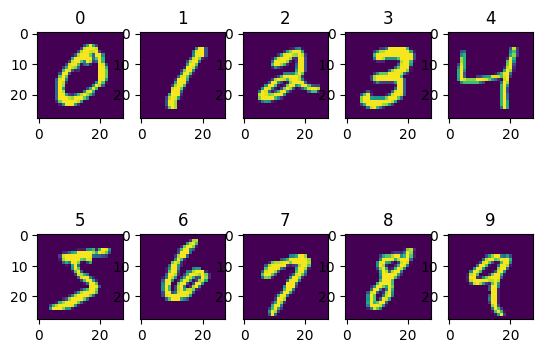

In [10]:
fig = plt.figure()
for k in reshaped_data_points:
  x = reshaped_data_points[k][0]
  fig.add_subplot(2,5,k+1)
  plt.imshow(x)
  plt.title(k)
fig.show()

In [11]:
adjusted_data_points = reshaped_data_points
for k in adjusted_data_points:
  condition = adjusted_data_points[k]>=100
  adjusted_data_points[k][condition]=1
  adjusted_data_points[k][~condition]=0


C:\Users\rawal\AppData\Local\Temp\ipykernel_27636\1488833115.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


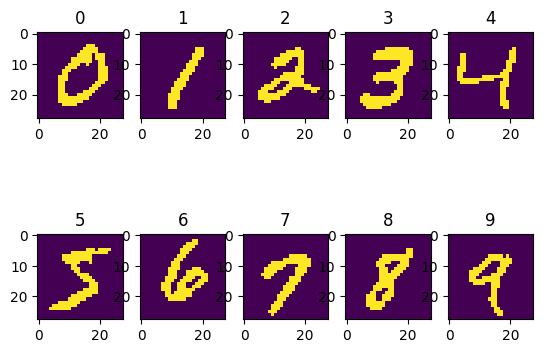

In [12]:
fig = plt.figure()
for k in adjusted_data_points:
  x = adjusted_data_points[k][0]
  fig.add_subplot(2,5,k+1)
  plt.imshow(x)
  plt.title(k)
fig.show()

## Naive Bayes Classifier

In [14]:
from scipy.stats import multivariate_normal as mvn
class GaussNB():
  def fit(self, X, y, eps=1e-3):
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))
    for k in self.K:
      X_k = X[y==k,:]
      self.likelihoods[k]={"Mean":X_k.mean(axis=0),"Covariance":X_k.var(axis=0)+eps}
      self.priors[k]=len(X_k)/len(X)

  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N,len(self.K)))
    for k, l in self.likelihoods.items():

      P_hat[:,k] = mvn.logpdf(X,l["Mean"],l["Covariance"]) + np.log(self.priors[k])

    return P_hat.argmax(axis=1)


## Bayes Gaussian Classifier

In [15]:
from scipy.stats import multivariate_normal as mvn
class BayesGaussianClassifier():
  def fit(self, X, y, eps=1e-3):
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))
    for k in self.K:
      X_k = X[y==k,:]
      N_k , D = X_k.shape
      mu_k = X_k.mean(axis = 0)

      self.likelihoods[k]={"Mean":X_k.mean(axis=0),
                           "Covariance":((1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k))+eps*np.identity(D)}
      self.priors[k]=len(X_k)/len(X)

  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N,len(self.K)))
    for k, l in self.likelihoods.items():

      P_hat[:,k] = mvn.logpdf(X,l["Mean"],l["Covariance"]) + np.log(self.priors[k])

    return P_hat.argmax(axis=1)


#### MIN-MAX Scaling

In [16]:
def preProcess_minMax(data):
  data_min = data.min()
  data_max = data.max()
  print(data_min,data_max)
  scaled_data = ((data - data_min)/(data_max - data_min))
  return scaled_data

#### Standardization

In [17]:
def preProcess_normalize(data):
  mean_values = np.mean(data, axis=0)
  std_values = np.std(data, axis=0)
  print(mean_values.shape,std_values.shape, sep="\n")
  standardized_data = np.nan_to_num((data - mean_values) / std_values)
  return standardized_data

In [18]:
def accuracy_score(y,y_hat):
  return np.mean(y==y_hat)

In [19]:
X = train.drop(columns = ['labels','index'])
y = train['labels']

In [20]:
X = X.to_numpy()
y = y.to_numpy()

In [21]:
X = preProcess_minMax(X)
# X = preProcess_normalize(X)

0 255


### Training the Naive Bayes Classifier

In [22]:
gnb_mnist=GaussNB()
gnb_mnist.fit(X,y)
print(gnb_mnist)

In [23]:
y_hat = gnb_mnist.predict(X)


In [24]:
print(accuracy_score(y,y_hat))

0.7682333333333333


### Training the Bayes Gaussian Classifier

In [25]:
bgc_mnist=BayesGaussianClassifier()
bgc_mnist.fit(X,y)
print(bgc_mnist)

In [26]:
y_hat = bgc_mnist.predict(X)

In [27]:
print(accuracy_score(y,y_hat))

0.9306333333333333


### Accuracies of the Naive Bayes and Gaussian Bayes Models on the Test set

In [29]:
test = pd.read_csv('MNIST_test.csv')

In [30]:
X_test = test.drop(columns = ['labels','index','Unnamed: 0'])
y_test = test['labels']

In [31]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [32]:
X_test.shape

(10000, 784)

In [33]:
X_test = preProcess_minMax(X_test)

0 255


In [34]:
y_hat_test = gnb_mnist.predict(X_test)


In [35]:
# Accuracy of Naive Bayes Model

print(accuracy_score(y_test,y_hat_test))

0.7746


In [36]:
y_hat_test = bgc_mnist.predict(X_test)

In [37]:
# Accuracy of Gaussian Naive Bayes Model

print(accuracy_score(y_test,y_hat_test))

0.9108


### KNN Classifier

In [41]:
class KNNClassifier():

  def fit(self, X, y):
    self.X=X
    self.y=y

  def predict(self, X, K, epsilon =1e-3):

    N=len(X)
    y_hat = np.zeros(N)
    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt  = np.argsort(dist2)[: K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights= gamma_k).argmax()
      print('Iteration : ',i,'/',N,end='\r',flush=True)

    return y_hat

In [42]:
knn = KNNClassifier()

In [43]:
knn.fit(X,y)

#### Generating Predictions directly on the Test Set

In [44]:
y_hat = knn.predict(X_test,3)

In [45]:
# Accuracy of KNN Algorithm on test set

print(accuracy_score(y_test,y_hat))

0.9717


### Time taken to predict a single Data Point

In [59]:
import time
start = time.time()
y_hat_single = knn.predict(X_test[:1].reshape(1,784),1)
end = time.time()
print('Predicted label : ',y_hat_single,'Time Taken : ',(end-start))

Predicted label :  [7.] Time Taken :  0.3072688579559326


### Plotting the confusion matrix on test set

Confusion Matrix:
[[974, 1, 1, 0, 0, 1, 2, 1, 0, 0], [0, 1133, 2, 0, 0, 0, 0, 0, 0, 0], [9, 7, 997, 2, 0, 0, 1, 14, 2, 0], [0, 1, 4, 975, 1, 13, 1, 7, 4, 4], [0, 5, 0, 0, 948, 0, 5, 4, 1, 19], [4, 1, 0, 12, 2, 860, 5, 1, 3, 4], [4, 3, 0, 0, 4, 3, 944, 0, 0, 0], [0, 18, 4, 0, 2, 0, 0, 994, 0, 10], [7, 0, 3, 13, 5, 11, 3, 4, 923, 5], [3, 4, 2, 7, 9, 4, 1, 8, 2, 969]]


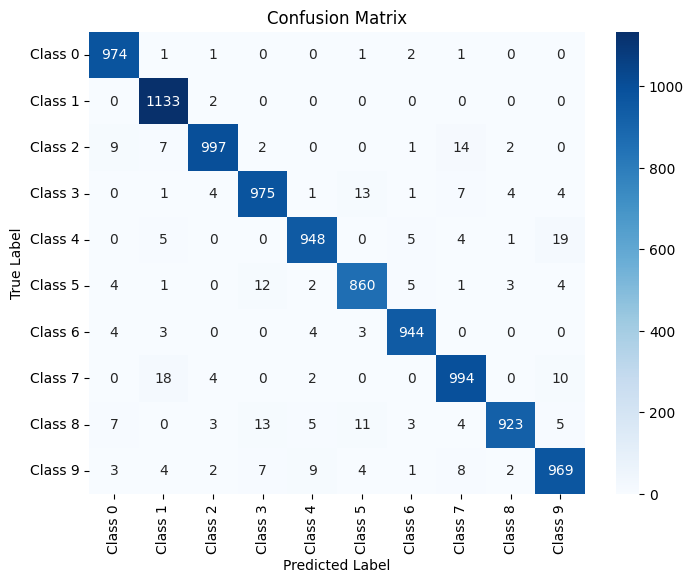

In [60]:
import seaborn as sns
def confusion_matrix(actual, predicted, num_classes):
    matrix = [[0] * num_classes for _ in range(num_classes)]

    for a, p in zip(actual, predicted):
        matrix[int(a)][int(p)] += 1

    return matrix

class_names = ["Class 0", "Class 1", "Class 2","Class 3","Class 4","Class 5","Class 6","Class 7","Class 8","Class 9",]

# Generate confusion matrix
num_classes = 10
conf_matrix = confusion_matrix(y_test, y_hat, num_classes)


# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()